In [2]:
import pandas as pd
import os

In [3]:
# Ensure the directories exist before saving
os.makedirs('../data', exist_ok=True)
os.makedirs('../data', exist_ok=True)

In [4]:
# Load the dataset
file_path = '../data/cricinfo_innings_data_final.csv'
df = pd.read_csv(file_path)
df.head()

,Score,Overs,RPO,Target,Lead,Inns,Result,Unnamed: 7,Opposition,Ground,Start Date,format,Column_13,Column_14,Column_15
0,overall,1877-2025,2107,916.0,786,11,355,39.0,1.165,31.69,3.24,2967,903.0,45.0,Profile
1,196,136.1x4,2.15,NaN,-49,2,lost,NaN,Test v Australia,Melbourne,15 Mar 1877,Test # 1,NaN,NaN,NaN
2,108,66.1x4,2.44,154.0,-45,4,lost,NaN,Test v Australia,Melbourne,15 Mar 1877,Test # 1,NaN,NaN,NaN
3,261,130.2x4,3.00,NaN,139,2,won,NaN,Test v Australia,Melbourne,31 Mar 1877,Test # 2,NaN,NaN,NaN
4,122/6,52.1x4,3.50,121.0,2,4,won,NaN,Test v Australia,Melbourne,31 Mar 1877,Test # 2,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Score       2981 non-null   object 
 1   Overs       2981 non-null   object 
 2   RPO         2981 non-null   object 
 3   Target      911 non-null    float64
 4   Lead        2981 non-null   int64  
 5   Inns        2981 non-null   int64  
 6   Result      2981 non-null   object 
 7   Unnamed: 7  1 non-null      float64
 8   Opposition  2981 non-null   object 
 9   Ground      2981 non-null   object 
 10  Start Date  2981 non-null   object 
 11  format      2981 non-null   object 
 12  Column_13   1 non-null      float64
 13  Column_14   1 non-null      float64
 14  Column_15   1 non-null      object 
dtypes: float64(4), int64(2), object(9)
memory usage: 349.5+ KB


In [10]:
# Remove entire rows where Format column contains ODI or T20 values
# Keep Test matches rows only
df_filtered = df[~df['format'].str.startswith(('ODI', 'T20I'), na=False)].copy()
df_filtered.head()

,Score,Overs,RPO,Target,Lead,Inns,Result,Unnamed: 7,Opposition,Ground,Start Date,format,Column_13,Column_14,Column_15
0,overall,1877-2025,2107,916.0,786,11,355,39.0,1.165,31.69,3.24,2967,903.0,45.0,Profile
1,196,136.1x4,2.15,NaN,-49,2,lost,NaN,Test v Australia,Melbourne,15 Mar 1877,Test # 1,NaN,NaN,NaN
2,108,66.1x4,2.44,154.0,-45,4,lost,NaN,Test v Australia,Melbourne,15 Mar 1877,Test # 1,NaN,NaN,NaN
3,261,130.2x4,3.00,NaN,139,2,won,NaN,Test v Australia,Melbourne,31 Mar 1877,Test # 2,NaN,NaN,NaN
4,122/6,52.1x4,3.50,121.0,2,4,won,NaN,Test v Australia,Melbourne,31 Mar 1877,Test # 2,NaN,NaN,NaN


In [34]:
# Drop unnecessary columns and reset the index
df_filtered = df.drop(columns=[col for col in df.columns if 'Unnamed' in col or 'Column' in col or 'format' in col])
df_filtered.head()

,Score,Overs,RPO,Target,Lead,Inns,Result,Opposition,Ground,Start Date,Opposition Team,Year
0,196.0,136.1x4,2.15,0.0,-49,2,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
1,108.0,66.1x4,2.44,154.0,-45,4,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
2,261.0,130.2x4,3.00,0.0,139,2,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
3,122.0,52.1x4,3.50,121.0,2,4,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
4,113.0,54.0x4,3.13,0.0,113,1,lost,Test v Australia,Melbourne,1879-01-02,Australia,1879


In [35]:
# Convert relevant columns to appropriate data types
# The dates in the dataset are in 'YYYY-MM-DD' format, so we let pandas infer it
df_filtered['Start Date'] = pd.to_datetime(df_filtered['Start Date'], errors='coerce')  # Convert to datetime

# First, convert Score column to string to handle all values properly
df_filtered['Score'] = df_filtered['Score'].astype(str)

# Update Score column with just the runs scored (before the "/")
df_filtered['Score'] = df_filtered['Score'].str.extract(r'(\d+)').astype(float)

# Display the dataframe
df_filtered

,Score,Overs,RPO,Target,Lead,Inns,Result,Opposition,Ground,Start Date,Opposition Team,Year
0,196.0,136.1x4,2.15,0.0,-49,2,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
1,108.0,66.1x4,2.44,154.0,-45,4,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
2,261.0,130.2x4,3.00,0.0,139,2,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
3,122.0,52.1x4,3.50,121.0,2,4,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
4,113.0,54.0x4,3.13,0.0,113,1,lost,Test v Australia,Melbourne,1879-01-02,Australia,1879
...,...,...,...,...,...,...,...,...,...,...,...,...
1954,565.0,96.3,5.85,0.0,565,1,won,Test v Zimbabwe,Nottingham,2025-05-22,Zimbabwe,2025
1955,465.0,100.4,4.61,0.0,-6,2,won,Test v India,Leeds,2025-06-20,India,2025
1956,373.0,82.0,4.54,371.0,3,4,won,Test v India,Leeds,2025-06-20,India,2025
1957,407.0,89.3,4.54,0.0,-180,2,lost,Test v India,Birmingham,2025-07-02,India,2025


In [36]:
# Handle missing values
df_filtered['Result'] = df_filtered['Result'].fillna('Unknown')
df_filtered['Target'] = df_filtered['Target'].fillna(0)
df_filtered['Lead'] = df_filtered['Lead'].fillna(0)
df_filtered.head()


,Score,Overs,RPO,Target,Lead,Inns,Result,Opposition,Ground,Start Date,Opposition Team,Year
0,196.0,136.1x4,2.15,0.0,-49,2,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
1,108.0,66.1x4,2.44,154.0,-45,4,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
2,261.0,130.2x4,3.00,0.0,139,2,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
3,122.0,52.1x4,3.50,121.0,2,4,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
4,113.0,54.0x4,3.13,0.0,113,1,lost,Test v Australia,Melbourne,1879-01-02,Australia,1879


In [37]:
# Remove rows with completely missing values
df_cleaned = df_filtered.dropna(how='all')

# Remove rows where Start Date is missing (NaT or NaN)
df_cleaned = df_cleaned.dropna(subset=['Start Date'])

In [38]:
df_cleaned

,Score,Overs,RPO,Target,Lead,Inns,Result,Opposition,Ground,Start Date,Opposition Team,Year
0,196.0,136.1x4,2.15,0.0,-49,2,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
1,108.0,66.1x4,2.44,154.0,-45,4,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
2,261.0,130.2x4,3.00,0.0,139,2,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
3,122.0,52.1x4,3.50,121.0,2,4,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
4,113.0,54.0x4,3.13,0.0,113,1,lost,Test v Australia,Melbourne,1879-01-02,Australia,1879
...,...,...,...,...,...,...,...,...,...,...,...,...
1954,565.0,96.3,5.85,0.0,565,1,won,Test v Zimbabwe,Nottingham,2025-05-22,Zimbabwe,2025
1955,465.0,100.4,4.61,0.0,-6,2,won,Test v India,Leeds,2025-06-20,India,2025
1956,373.0,82.0,4.54,371.0,3,4,won,Test v India,Leeds,2025-06-20,India,2025
1957,407.0,89.3,4.54,0.0,-180,2,lost,Test v India,Birmingham,2025-07-02,India,2025


In [39]:
# Remove rows where Opposition column starts with T20I
df_cleaned = df_cleaned[~df_cleaned['Opposition'].str.startswith(('T20I','ODI'), na=False)]

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned

,Score,Overs,RPO,Target,Lead,Inns,Result,Opposition,Ground,Start Date,Opposition Team,Year
0,196.0,136.1x4,2.15,0.0,-49,2,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
1,108.0,66.1x4,2.44,154.0,-45,4,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
2,261.0,130.2x4,3.00,0.0,139,2,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
3,122.0,52.1x4,3.50,121.0,2,4,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
4,113.0,54.0x4,3.13,0.0,113,1,lost,Test v Australia,Melbourne,1879-01-02,Australia,1879
...,...,...,...,...,...,...,...,...,...,...,...,...
1954,565.0,96.3,5.85,0.0,565,1,won,Test v Zimbabwe,Nottingham,2025-05-22,Zimbabwe,2025
1955,465.0,100.4,4.61,0.0,-6,2,won,Test v India,Leeds,2025-06-20,India,2025
1956,373.0,82.0,4.54,371.0,3,4,won,Test v India,Leeds,2025-06-20,India,2025
1957,407.0,89.3,4.54,0.0,-180,2,lost,Test v India,Birmingham,2025-07-02,India,2025


In [40]:
#Starting the EDA Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Save the cleaned dataset
df_cleaned.to_csv('../data/cricinfo_innings_data_clean_final.csv', index=False)

In [42]:
print("Data cleaning completed and saved to '../data/cricinfo_innings_data_clean_final.csv'")
print("First few rows of the cleaned dataset:")
df_cleaned.head()

Data cleaning completed and saved to '../data/cricinfo_innings_data_clean_final.csv'
First few rows of the cleaned dataset:


,Score,Overs,RPO,Target,Lead,Inns,Result,Opposition,Ground,Start Date,Opposition Team,Year
0,196.0,136.1x4,2.15,0.0,-49,2,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
1,108.0,66.1x4,2.44,154.0,-45,4,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
2,261.0,130.2x4,3.00,0.0,139,2,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
3,122.0,52.1x4,3.50,121.0,2,4,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
4,113.0,54.0x4,3.13,0.0,113,1,lost,Test v Australia,Melbourne,1879-01-02,Australia,1879


In [43]:
#Starting the EDA ANALYSIS

In [44]:
# Load the cleaned dataset
df = pd.read_csv('../data/cricinfo_innings_data_clean_final.csv')

In [45]:
# Convert 'Start Date' to datetime again (as it may be read as string from CSV)
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df

,Score,Overs,RPO,Target,Lead,Inns,Result,Opposition,Ground,Start Date,Opposition Team,Year
0,196.0,136.1x4,2.15,0.0,-49,2,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
1,108.0,66.1x4,2.44,154.0,-45,4,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
2,261.0,130.2x4,3.00,0.0,139,2,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
3,122.0,52.1x4,3.50,121.0,2,4,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
4,113.0,54.0x4,3.13,0.0,113,1,lost,Test v Australia,Melbourne,1879-01-02,Australia,1879
...,...,...,...,...,...,...,...,...,...,...,...,...
1954,565.0,96.3,5.85,0.0,565,1,won,Test v Zimbabwe,Nottingham,2025-05-22,Zimbabwe,2025
1955,465.0,100.4,4.61,0.0,-6,2,won,Test v India,Leeds,2025-06-20,India,2025
1956,373.0,82.0,4.54,371.0,3,4,won,Test v India,Leeds,2025-06-20,India,2025
1957,407.0,89.3,4.54,0.0,-180,2,lost,Test v India,Birmingham,2025-07-02,India,2025


In [46]:
# Extract Opposition Team from 'Opposition' column
df['Opposition Team'] = df['Opposition'].apply(lambda x: x.split(' v ')[1])
df


,Score,Overs,RPO,Target,Lead,Inns,Result,Opposition,Ground,Start Date,Opposition Team,Year
0,196.0,136.1x4,2.15,0.0,-49,2,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
1,108.0,66.1x4,2.44,154.0,-45,4,lost,Test v Australia,Melbourne,1877-03-15,Australia,1877
2,261.0,130.2x4,3.00,0.0,139,2,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
3,122.0,52.1x4,3.50,121.0,2,4,won,Test v Australia,Melbourne,1877-03-31,Australia,1877
4,113.0,54.0x4,3.13,0.0,113,1,lost,Test v Australia,Melbourne,1879-01-02,Australia,1879
...,...,...,...,...,...,...,...,...,...,...,...,...
1954,565.0,96.3,5.85,0.0,565,1,won,Test v Zimbabwe,Nottingham,2025-05-22,Zimbabwe,2025
1955,465.0,100.4,4.61,0.0,-6,2,won,Test v India,Leeds,2025-06-20,India,2025
1956,373.0,82.0,4.54,371.0,3,4,won,Test v India,Leeds,2025-06-20,India,2025
1957,407.0,89.3,4.54,0.0,-180,2,lost,Test v India,Birmingham,2025-07-02,India,2025


In [47]:
# Create a match-level dataset for result-based analyses
matches = df.groupby(['Start Date', 'Opposition']).first().reset_index()

In [48]:
print("\n### Number of Matches Against Each Opposition")
print(matches['Opposition Team'].value_counts().head(10))  # Top 10 for brevity



### Number of Matches Against Each Opposition
Opposition Team
Australia       361
West Indies     166
South Africa    156
India           138
New Zealand     115
Pakistan         92
Sri Lanka        39
Bangladesh       10
Zimbabwe          7
Ireland           2
Name: count, dtype: int64


In [49]:
print("\n### Result Percentages (Match-Level)")
print(matches['Result'].value_counts(normalize=True) * 100)


### Result Percentages (Match-Level)
Result
won     37.016575
draw    32.688766
lost    30.294659
Name: proportion, dtype: float64


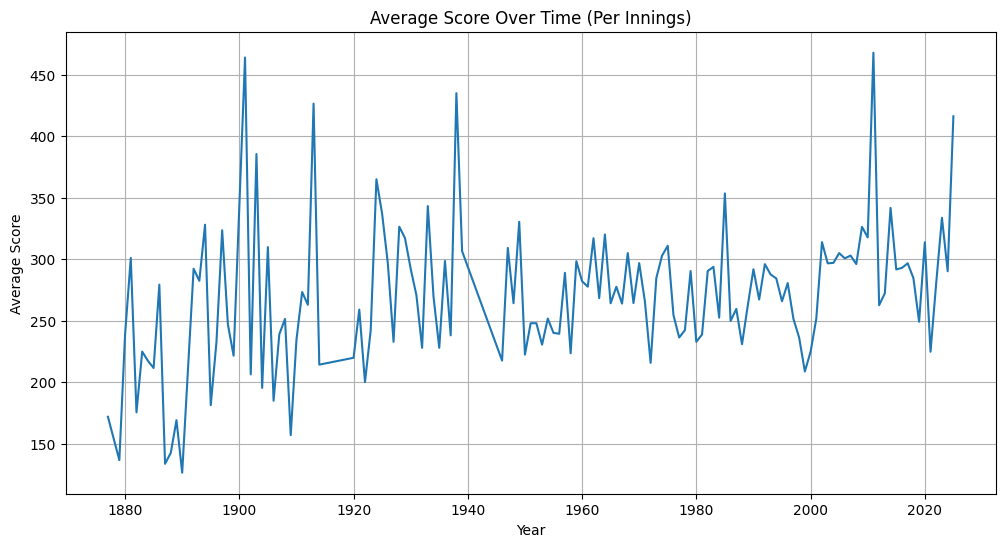

In [50]:
# Average Score Over Time
df['Year'] = df['Start Date'].dt.year
avg_score_by_year = df.groupby('Year')['Score'].mean()
plt.figure(figsize=(12, 6))
avg_score_by_year.plot()
plt.title('Average Score Over Time (Per Innings)')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

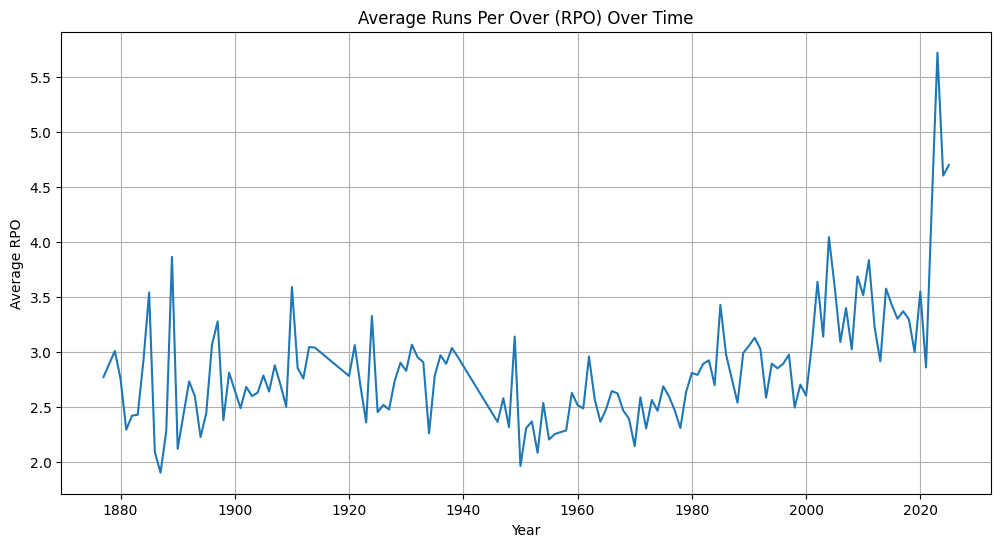

In [51]:
# Convert RPO column to numeric, handling any non-numeric values
df['RPO'] = pd.to_numeric(df['RPO'], errors='coerce')

# Average RPO Over Time
avg_rpo_by_year = df.groupby('Year')['RPO'].mean()
plt.figure(figsize=(12, 6))
avg_rpo_by_year.plot()
plt.title('Average Runs Per Over (RPO) Over Time')
plt.xlabel('Year')
plt.ylabel('Average RPO')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

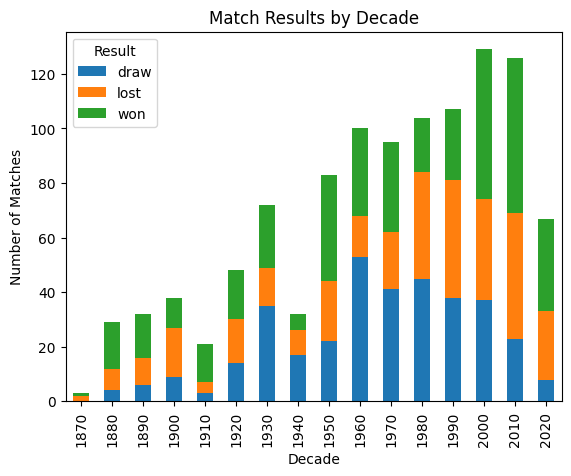

In [52]:
# Results by Decade (Match-Level)
matches['Decade'] = (matches['Start Date'].dt.year // 10) * 10
win_loss_by_decade = matches.groupby(['Decade', 'Result']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
win_loss_by_decade.plot(kind='bar', stacked=True)
plt.title('Match Results by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Matches')
plt.legend(title='Result')
plt.show()

In [54]:
# Now perform the groupby operation
win_loss_by_opposition = matches.groupby(['Opposition Team', 'Result']).size().unstack().fillna(0)

# Calculate win percentage
win_loss_by_opposition['Win Percentage'] = (win_loss_by_opposition.get('won', 0) / win_loss_by_opposition.sum(axis=1)) * 100

print("\n### Performance Against Top Oppositions (Win Percentage)")
print(win_loss_by_opposition.sort_values('Win Percentage', ascending=False).head(10))


### Performance Against Top Oppositions (Win Percentage)
Result           draw   lost    won  Win Percentage
Opposition Team                                    
Ireland           0.0    0.0    2.0      100.000000
Bangladesh        0.0    1.0    9.0       90.000000
Zimbabwe          3.0    0.0    4.0       57.142857
Sri Lanka        11.0    9.0   19.0       48.717949
New Zealand      47.0   14.0   54.0       46.956522
South Africa     55.0   35.0   66.0       42.307692
India            50.0   36.0   52.0       37.681159
Pakistan         39.0   23.0   30.0       32.608696
West Indies      53.0   59.0   54.0       32.530120
Australia        97.0  152.0  112.0       31.024931


In [55]:
# Ground Analysis (Match-Level)
top_grounds = matches['Ground'].value_counts().head(10)
print("\n### Top 10 Grounds by Number of Matches")
print(top_grounds)


### Top 10 Grounds by Number of Matches
Ground
Lord's          145
The Oval        106
Manchester       84
Leeds            81
Nottingham       66
Sydney           57
Melbourne        57
Birmingham       57
Adelaide         33
Johannesburg     29
Name: count, dtype: int64


In [56]:
# Performance at Top Grounds
df_top_grounds = matches[matches['Ground'].isin(top_grounds.index)]
performance_at_grounds = df_top_grounds.groupby(['Ground', 'Result']).size().unstack().fillna(0)
print("\n### Performance at Top Grounds")
print(performance_at_grounds)


### Performance at Top Grounds
Result        draw  lost  won
Ground                       
Adelaide         5    19    9
Birmingham      15    12   30
Johannesburg     9    10   10
Leeds           18    25   38
Lord's          51    35   59
Manchester      36    15   33
Melbourne        8    29   20
Nottingham      23    18   25
Sydney           8    27   22
The Oval        37    24   45
